# **PROJECT: NO-SHOWS APOINTMENT DATA ANLAYSIS**

##  **A Brief Description Of The No-Shows Appointment Data**

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not 
  patients show up for their appointment. A number of characteristics about the patient are included in each row.
    
### Here is a list of all column names on this dataset
> Client ID, Appoinment ID, Gender, Scheduled day, Appointment Day, Age, Neighbourhood, Scholarship, Hipertension, Diabetes,
  Hipertension, Alcoholism, Handicap, SMS_received, No-show.

### Here are the significances of the columns

> *Patient ID*: Identification of a patient
    
> *Appointment ID*: Identification of each appointment
    
> *Gender*: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

> *Scheduled Day*: tells us on what day the patient set up their appointment.
    
> *Neighborhood*: indicates the location of the hospital.

> *Age*: How old is the patient.

>  *Hipertension*: True or False

>  *Diabetes*: True or False

>  *Alcoholism*: True or False

>  *Handcap*: True or False

>  *SMS_received*: 1 or more messages sent to the patient.

>  *No-show*: True or False.

> *Scholarship*: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

    > **Key Point**

> Encoding of the last column (Scholarship): it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## **Data Wrangling**

> The first thing thing we do before running any code in this noebook would be importing the neccessary packages needed for this analysis.

In [1]:
# importing statements for all the packages i plan to use

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


> The next step is loading the dataset we are working on.

In [2]:
## Load the data and print out a few lines
df = pd.read_csv(r"C:\Users\DIOH\Downloads\noshowappointments-kagglev2-may-2016.csv")

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Now, we have our dataset, we would like to confirm the number of rows and columns in this dataset

In [3]:
# Confirming the number of columns and rows
df.shape

(110527, 14)

> The next crucial step is to check for errors in our dataset and then fix them. We check for errors like missing values, wrong data types, duplicates, outliers.

In [73]:
# Checking for wrong data types 

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> From the above data, we can see that most of our columns have the correct data types. Except columns like Scheduled Day and Appointment Day. These 2 columns ought to have a datetime date time datatype not the object data type. Hence, we need to fix this. 

In [13]:
# Checking for missing values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> From the above data, we can also see that there are no missing values

In [16]:
# Checking for duplicates

df.duplicated().sum()

0

> There are no duplicate values

## **Data Cleaning**

> In this step of data cleaning, we fix every error detected, so that these errors do not intefere with our analysis. 

> Let us start by dropping columns which are not relevant to our analysis.

In [3]:
# drop columns not relevant to us from this dataset
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# confirm changes
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> Once, we drop these columns,we can also run a check on our dataset, to confirm our rows and columns. Initially we had 14 columns, we just dropped 2 columns, so we are exepceted to have 12 columns now.

In [4]:
# Confirming the rows and columns
df.shape

(110527, 12)

> We can also rename some of our column names with 2 letter word to a proper code standard names by adding an underscore between these 2 words.

In [5]:
# renaming columns
df.rename(columns={'ScheduledDay' : 'Scheduled_Day', 'AppointmentDay' : 'Appointment_Day', 'No-show' : 'No_show', 'Handcap' : 'Handicap'}, inplace=True)

# confirming changes
df.head(1)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> Now we can fix our data types errors namely Scheduled day and Appointment day having an object datatype, we fix them by converting their data type to a datetime data type. 

In [6]:
# fixing our datatype
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])

#confirming changes
df.head(1)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [78]:
# fixing our datatype
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

# confirming changes
df.head(1)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [79]:
#confirming that the datatypes has been fixed

df.dtypes

Gender                          object
Scheduled_Day      datetime64[ns, UTC]
Appointment_Day    datetime64[ns, UTC]
Age                              int64
Neighbourhood                   object
Scholarship                      int64
Hipertension                     int64
Diabetes                         int64
Alcoholism                       int64
Handicap                         int64
SMS_received                     int64
No_show                         object
dtype: object

> We can further access our data by looking at the descripitive statisics of the dataset to have a clearer understanding of the datset we are working on.

In [14]:
# Descriptive Statistics for each column of data

df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> For the purpose of this analysis, i will be picking out the No_show column as my column of interest. 

> I would like to check the unique values in this column. 

In [8]:
#this returns the unique values in the No_show column

df['No_show'].unique()

array(['No', 'Yes'], dtype=object)

> From this output, its a either a Yes or No. so its either the patient showed up to the appointment represented by a 'NO' or the patient did not show up reperesented by a 'Yes'.

> So, lets find out the number of patients that showed up and the ones that didn't show up.

In [27]:
# this counts the number of Yes and No in the No_show column

df['No_show'].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

> Now, that we know the number of persons that showed up or did not show up. We can filter our dataset to reflect only those who did not show up for their appointment. Since they are our patients of interest in this analysis. We will call this dataframe 'Did_Not_Show_up'.

In [7]:
# filtering and creating a dataframe to reflect only the YES in the No_show column

Did_Not_show_up = df[df['No_show'] == 'Yes']

# confirming changes
Did_Not_show_up.head()



,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
6,F,2016-04-27 15:05:12+00:00,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27 15:39:58+00:00,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,2016-04-26 08:44:12+00:00,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,2016-04-28 09:28:57+00:00,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,2016-04-27 07:51:14+00:00,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


> Now we have a dataframe showing us ONLY those that did not show up for the apppointment


> We can now now access our new dataframe, checking its descriptive statistics, rows and columns.

In [16]:
# Descriptive Statistics for each column of data

Did_Not_show_up.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# checking the rows and columns

Did_Not_show_up.shape

(22319, 12)

> Now that we are done fixing and accessing our data, we can proceed with our Data Exploration.

## **Exploratory Data Analysis**

#**Question 1: Could SMS received be a contributing factor to people not showing up to the appointement? How?**

> Solution: Let's check out if everyone received the sms

In [80]:
# this returns the unique values in the SMS_received column

Did_Not_show_up['SMS_received'].unique()

array([0, 1], dtype=int64)

In [33]:
# number of persons that received or did not receive sms
Did_Not_show_up['SMS_received'].value_counts()

0    12535
1     9784
Name: SMS_received, dtype: int64

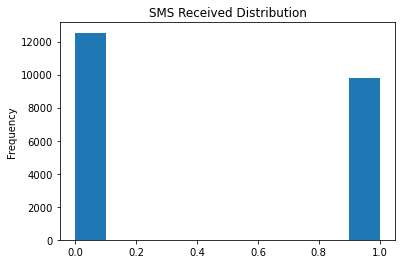

In [13]:
# A clear distribution of those that receievd the sms versus those that didn't

Did_Not_show_up['SMS_received'].plot(kind='hist', xlabel= 'SMS Received', ylabel= 'No. of patients', title= 'SMS Received Distribution');

> The above histogram clealrly shows a distribution of sms received by the patients. Here we can see that a greater number of the patients did not receive the sms. 

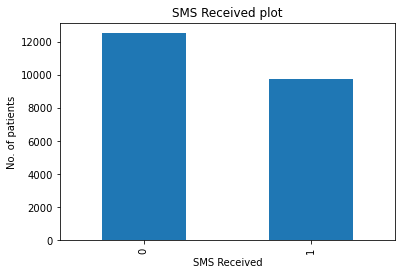

In [12]:
# Let's visualise our findings using a barchart


Did_Not_show_up['SMS_received'].value_counts().plot(kind='bar', xlabel= 'SMS Received', ylabel= 'No. of patients', title= 'SMS Received plot');

> Our barchart here also clearly show us that 12000 and more patients which appears to be a greater number of the patient population did not receive the sms. Which in turn contributed to the patients not showing up to their appointments.

#**Question 2: Being handicap can actual be a great reason why some persons may not show up, Do we have a lot of handicaps?**

> Solution: Analyse the handicap column

In [52]:
# checking the number of those that are handicapped and those that are not.

Did_Not_show_up['Handicap'].value_counts()

0    21912
1      366
2       37
3        3
4        1
Name: Handicap, dtype: int64

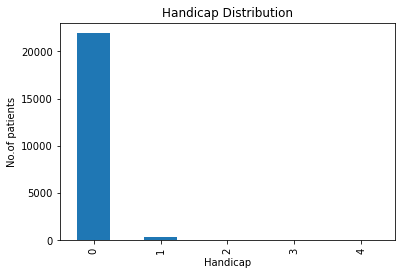

In [19]:
# plotting a bar chart to show us the proportion of persons handicpped and those that are not.

Did_Not_show_up['Handicap'].value_counts().plot(kind='bar', xlabel= 'Handicap', ylabel= 'No.of patients', title= 'Handicap Distribution');

> This bar chart clearly shows that most persons are Not handicaped, but a minute number of the patient population are handicapped.

#**Question 3: Not Being a beneficiary of the scholarship program is also a great factor, Do we have persons not benefititing from this program?**

> Solution: Lets look at the Scholarship column

In [54]:
# Analysing the number of persons benefitting from the Bolsa Familia Scholarship program

Did_Not_show_up['Scholarship'].value_counts()

0    19741
1     2578
Name: Scholarship, dtype: int64

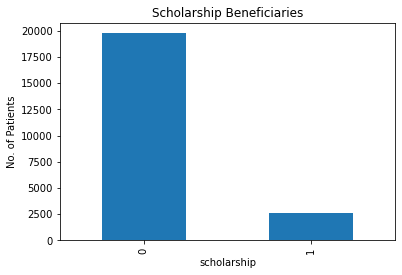

In [16]:
# plotting a bar chart to show us the proportion of patients benefiting from the scholarship and those that are not.

Did_Not_show_up['Scholarship'].value_counts().plot(kind='bar', xlabel= 'scholarship', ylabel='No. of Patients', title= 'Scholarship Beneficiaries');

>From this bar chart we can clearly see that more than 75% of the population are not benefitting from this program. Thus patients who are not beneficiaries couldnt show up.

In [67]:
#lets find out the mean for each SMS received 

Did_Not_show_up.groupby('SMS_received').mean()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap
SMS_received,,,,,,
0,34.642920,0.111209,0.177663,0.070682,0.031911,0.024412
1,33.900961,0.121014,0.157911,0.055601,0.028312,0.015025


In [60]:
# the average scholarship for those that receive the sms and are handicapped.

Did_Not_show_up.groupby(['SMS_received', 'Handicap'], as_index=False)['Scholarship'].mean()

,SMS_received,Handicap,Scholarship
0,0,0,0.112452
1,0,1,0.058333
2,0,2,0.033333
3,0,3,0.000000
4,1,0,0.121360
5,1,1,0.103175
6,1,2,0.000000
7,1,3,0.000000
8,1,4,0.000000


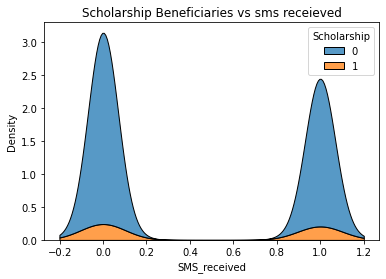

In [18]:
# An sns plot showing the distribution of those that receieved the sms and the scholarship beneficiaries

sns.kdeplot(data=Did_Not_show_up, x="SMS_received", hue="Scholarship", multiple="stack").set(title='Scholarship Beneficiaries vs sms receieved');

> Looking at this plot, we can clearly see just a small number of patients received the sms and are also on schoarship. A greater number of the population are not beneficiaries. Hence they couldnt show up to the appointment.

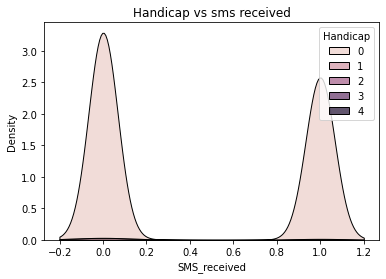

In [19]:
# An sns plot showing the distribution of those that receieved the sms and those that are handicapped

sns.kdeplot(data=Did_Not_show_up, x="SMS_received", hue="Handicap", multiple="stack", warn_singular=False).set(title='Handicap vs sms received');

> This kdeplot shows that a greater number of patients are not handicapped but they did not receive the sms. Hence they couldn't show up to their appointment. 

### **Conclusions** : From the above data analysis, we can deduce that;

> Most persons did not receive the sms (more than 50% of the population). Hence contributing to their not showing up to the appointment.

> The analysis also showed that few persons are handicapped, hence could not make it to their appointment

> Also more than 75% of the population are not beneficiarie of the Bolsa Familia program, hence they also couldn't make it to the appointment due to financial constraints.

> Finally we'v clearly seen that even though some persons received the sms, they still did NOT show up for the appointment because they are either handicapped or not benefitting from the scholarship program.

##**Limitations** 

> **Handicap**: This handicap column seemed not to be self- explanatory. it has unique values such as 0,1,2,3,4. We already know 0 and 1 represent False and True respectively. The rest of the values (2,3,4) could still mean that an individual is handicapped in more than one part of his/her body. These values could mean a lot of different things. The author of the dataset did not give any additional information on that. Notwithstanding provided the value is not 0, it means the individual is handicapped.

> **Age**: The age column has an outlier like 115 and values like 0 and -1. Also here the author of the dataset did not provide sufficient information concerning this. I worked with these values because in real life situation, we could still have someone of that age (115). -1 could represent an unborn child, while 0 represents a Newborn. These are my own intepretations. Not having sufficient information about this from the author already poses a hindrance.

>**Neighbourhood**: Here there is no additional information in this column to know the proximity of the neighbourhoods to the health centres. To ascertain  mobility or whether its a flood prone region. There are a lot of things to consider in this column, but no additional information was given. 